# Authors -- Sourav Ghosh | SRM University AP | sourav_ghosh@srmap.edu.in
# -- Prof. Ranjit Thapa | SRM University AP | ranjit.t@srmap.edu.in

## Train the dataset on simple regression models , We will use the following models

* Ridge regression
* Lasso regression
* Random forest regressor
* KNeighbours regressor
* Support vector regressor
  

In [1460]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
plt.rc('font', family='Helvetica')
plt.rc('axes', linewidth=2.5)

In [1461]:
df=pd.read_csv('pca_corr_filtered_data.csv')
cols=df.columns
df=df.drop(cols[0],axis=1)
df.head()

,d-fr,Dwd,y
0,0.422,26.661,0.48
1,0.417,25.839,0.44
2,0.404,27.734,0.35
3,0.421,25.368,0.45
4,0.411,24.582,0.43


In [1462]:
df.describe()

,d-fr,Dwd,y
count,415.000000,415.000000,415.000000
mean,0.315284,8.666805,0.705542
std,0.137822,16.234157,0.238956
min,0.046000,-89.643000,0.250000
25%,0.175000,-8.923000,0.505000
50%,0.321000,14.192000,0.720000
75%,0.418000,18.874000,0.850000
max,0.621000,72.161000,1.390000


In [1463]:
df_X=df.drop('y',axis=1)
df_X.head()

,d-fr,Dwd
0,0.422,26.661
1,0.417,25.839
2,0.404,27.734
3,0.421,25.368
4,0.411,24.582


In [1464]:
df_y=df['y']
df_y.head()

0    0.48
1    0.44
2    0.35
3    0.45
4    0.43
Name: y, dtype: float64

In [1465]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size=0.20, random_state=40)
print(X_train.shape)
print(X_test.shape)

(332, 2)
(83, 2)


In [1466]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
# X_train = normalize(X_train)
# X_test = normalize(X_test)

[[-1.14226572e+00 -1.19915047e+00]
 [-5.25179639e-02  4.71167531e-01]
 [ 7.09867813e-02  3.80123198e-01]
 [-1.20038560e+00 -1.44997700e+00]
 [-1.30936037e+00 -9.70569789e-01]
 [ 1.18979447e+00  4.42496446e-01]
 [ 4.99620897e-01  1.23152712e+00]
 [ 7.17570447e-01  1.47992904e+00]
 [-1.91235413e+00 -9.88027024e-01]
 [ 9.71844923e-01  5.25236469e-01]
 [-1.11320578e+00 -1.13253414e+00]
 [-3.79879939e-02  3.46966574e-01]
 [-8.22606375e-01 -1.53126225e+00]
 [ 2.01318862e-02  2.01732072e-01]
 [ 3.25261257e-01  7.30419602e-01]
 [ 1.95988288e+00  2.05247765e-01]
 [-1.36021527e+00 -1.10307506e+00]
 [ 7.82955312e-01  1.10817478e+00]
 [ 1.07311706e-01  3.78547198e-01]
 [-1.14953070e+00 -1.17047938e+00]
 [-1.29483040e+00 -1.10543906e+00]
 [-1.05508590e+00 -1.46604008e+00]
 [-8.92805387e-03  4.90685690e-01]
 [-1.03372859e-01  3.26902876e-01]
 [ 1.21158943e+00  4.67106299e-01]
 [-6.70479340e-02  3.87275816e-01]
 [ 1.08081970e+00  3.77213659e-01]
 [ 7.82517663e-02  6.78411588e-01]
 [ 1.18979447e+00  6

In [1467]:
X_train[0]

array([-1.14226572, -1.19915047])

In [1468]:
from time import time

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [1469]:
df_simple_reg = pd.DataFrame(columns=['model_name','model_name_pretty','model_params','fit_time','r2_train','mae_train',
                                    'rmse_train','r2_test','mae_test',
                                    'rmse_test'])
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_test,mae_test,rmse_test


In [1470]:
# Build a dictionary of model names
from collections import OrderedDict
simple_reg_model_names = OrderedDict({
    'rr': Ridge,
    'lr': Lasso,
    'rfr': RandomForestRegressor,
    'svr': SVR,
    'knr': KNeighborsRegressor,
    'mlr': LinearRegression,
    'bayesR':BayesianRidge
})
# simple_reg_model_names = OrderedDict({
#     'Ridge': Ridge,
#     'Lasso': Lasso,
#     'RFR': RandomForestRegressor,
#     'SVR': SVR,
#     'MLR': LinearRegression
# })

In [1471]:
def model_train_eval(model,X_train,Y_train,X_test,Y_test):
    #Fit the model
    t = time()
    model=model()
    model.fit(X_train,Y_train)
    time_to_fit = time()-t

    #Evaluate the model
    y_actual_train = Y_train
    y_predicted_train = model.predict(X_train)
    y_actual_test = Y_test
    y_predicted_test = model.predict(X_test)
    #Get the scores
    r2_Score_train = r2_score(y_actual_train,y_predicted_train)
    mae_train = mean_absolute_error(y_actual_train,y_predicted_train)
    rmse_train = mean_squared_error (y_actual_train,y_predicted_train,squared=False)
    r2_Score_test = r2_score(y_actual_test,y_predicted_test)
    mae_test = mean_absolute_error(y_actual_test,y_predicted_test)
    rmse_test = mean_squared_error (y_actual_test,y_predicted_test,squared=False)

    #Results
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': time_to_fit,
        'r2_train': r2_Score_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_test': r2_Score_test,
        'mae_test': mae_test,
        'rmse_test': rmse_test,
    }
    return result_dict

In [1472]:
simple_reg_models = OrderedDict()
# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in simple_reg_model_names.items():
    print(f'Currently running {model_name}: {model.__name__}')
    result_dict = model_train_eval(model, X_train, y_train,X_test, y_test)
    df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)

Currently running rr: Ridge
Currently running lr: Lasso
Currently running rfr: RandomForestRegressor
Currently running svr: SVR
Currently running knr: KNeighborsRegressor
Currently running mlr: LinearRegression
Currently running bayesR: BayesianRidge


/var/folders/b3/583r3vtn1f1dhh2m6jxr5y7w0000gn/T/ipykernel_83271/748405818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)
/var/folders/b3/583r3vtn1f1dhh2m6jxr5y7w0000gn/T/ipykernel_83271/748405818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)
/var/folders/b3/583r3vtn1f1dhh2m6jxr5y7w0000gn/T/ipykernel_83271/748405818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_simple_reg = df_simple_reg.append(result_dict, ignore_index=True)
/var/folders/b3/583r3vtn1f1dhh2m6jxr5y7w0000gn/T/ipykernel_83271/748405818.py:6: FutureWarning: The frame.append method is deprecated and will be

In [1473]:
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_test,mae_test,rmse_test
0,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.001635,0.600560,0.117488,0.148232,0.749706,0.102503,0.127332
1,lr,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.000516,0.000000,0.183954,0.234539,-0.000009,0.198629,0.254516
2,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.058522,0.960630,0.029997,0.046537,0.888376,0.060362,0.085034
3,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.001538,0.772186,0.080519,0.111945,0.886627,0.066535,0.085697
4,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000173,0.857072,0.057964,0.088670,0.875556,0.067205,0.089784
5,mlr,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.000346,0.600563,0.117514,0.148231,0.750288,0.102425,0.127184
6,bayesR,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_in...",0.000274,0.600551,0.117461,0.148233,0.749080,0.102587,0.127492


In [1474]:
## Get the best fit model based on r2score
df_simple_reg = df_simple_reg.sort_values('r2_train', ignore_index=True)
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_test,mae_test,rmse_test
0,lr,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.000516,0.000000,0.183954,0.234539,-0.000009,0.198629,0.254516
1,bayesR,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_in...",0.000274,0.600551,0.117461,0.148233,0.749080,0.102587,0.127492
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.001635,0.600560,0.117488,0.148232,0.749706,0.102503,0.127332
3,mlr,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.000346,0.600563,0.117514,0.148231,0.750288,0.102425,0.127184
4,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.001538,0.772186,0.080519,0.111945,0.886627,0.066535,0.085697
5,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000173,0.857072,0.057964,0.088670,0.875556,0.067205,0.089784
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.058522,0.960630,0.029997,0.046537,0.888376,0.060362,0.085034


In [1475]:
# Get the parameters of the best performing model
best_r2score_train= df_simple_reg.iloc[-1, :].copy()
model = simple_reg_model_names[best_r2score_train['model_name']](**best_r2score_train['model_params'])
model.fit(X_train, y_train)

RandomForestRegressor()

In [1476]:
best_r2score_train['model_params']

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1477]:
y_act_test = y_test
y_pred_test = model.predict(X_test)


r2 = r2_score(y_act_test, y_pred_test)
mae = mean_absolute_error(y_act_test, y_pred_test)
rmse = mean_squared_error(y_act_test, y_pred_test, squared=False)

print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

r2: 0.8860
mae: 0.0612
rmse: 0.0859


In [1478]:
def plot_pred_vs_act(act, pred, model, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])
    plot = plt.figure(figsize=(10,10))
    plt.plot(act, pred, 'o', ms=15, mec='b', mfc='silver', alpha=0.8)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    plt.axis('scaled')
    plt.xlabel(f'Actual',fontsize=16)
    plt.ylabel(f'Predicted',fontsize=16)
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}',fontsize=16)
    plt.legend(loc='upper left',fontsize=14)
    plt.tick_params(which='major',left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = True,direction="in",width = 2,length = 4)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    return plot

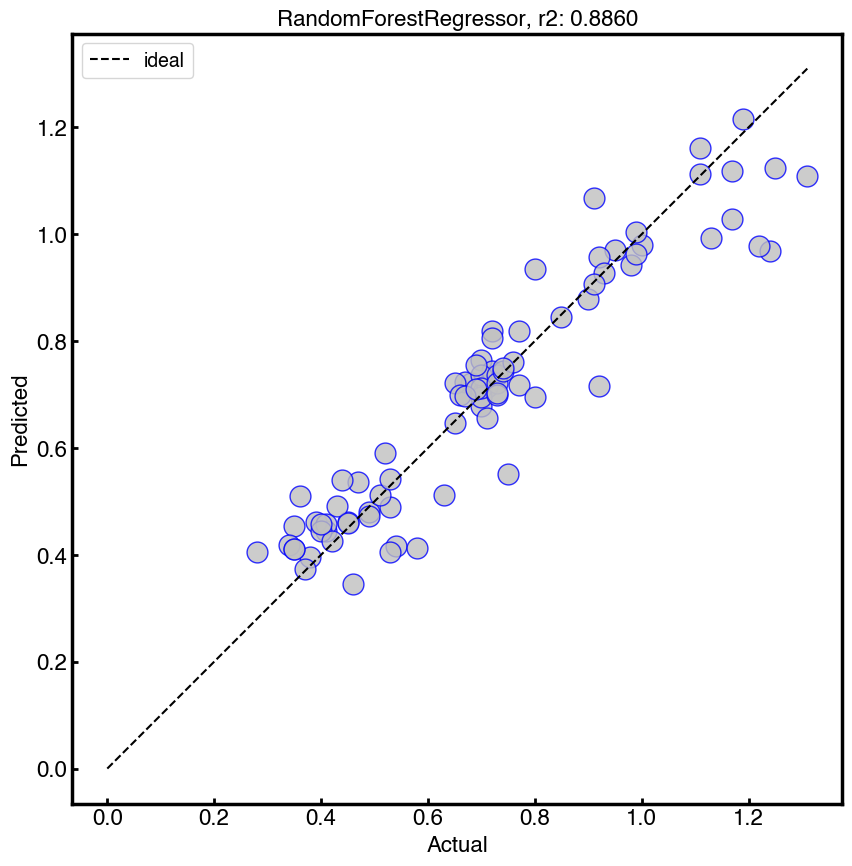

In [1479]:
plot = plot_pred_vs_act(y_act_test, y_pred_test, model)

## Linear Regression

In [1480]:
def plot_pred_vs_act2(act, pred, model,r2_score, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])
    plot = plt.figure(figsize=(10,10))
    plt.plot(act, pred, 'o', ms=15, mec='b', mfc='silver', alpha=0.8)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    plt.axis('scaled')
    plt.xlabel(f'Actual',fontsize=16)
    plt.ylabel(f'Predicted',fontsize=16)
    ##plt.title(f'{model}, r2: {r2_score:0.4f}',fontsize=16)
    plt.legend(loc='upper left',fontsize=14)
    plt.tick_params(which='major',left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = True,direction="in",width = 2,length = 4)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    return plot

In [1481]:
cols1=['x1','x2','target','coef1','coef2','intercept','r2_test','r2_train']
res1=pd.DataFrame(columns=cols1)
def do_lin_reg(X_train,y_train,X_test,y_test):
    
    # Create an instance of the LinearRegression class
    reg = LinearRegression()
 
    
    # Fit the model to the data
    reg.fit(X_train, y_train)
    #Coefficients
    #print(reg.coef_)
    #Intercept
    #print(reg.intercept_)
    #r2_score
    y_pred=reg.predict(X_test)
    r2_test=r2_score(y_test, y_pred)
    y_pred_train=reg.predict(X_train)
    r2_train=r2_score(y_train, y_pred_train)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    #print(r2)
    y_pred_df=pd.DataFrame(data=y_pred,columns=[df.columns[-1]])
    #plot = plot_pred_vs_act2(y_test,y_pred,'mlr',r2_score)
    return [reg.coef_,reg.intercept_,r2_test,r2_train,mae,rmse]
    
    

In [1482]:
cols_x=df_X.columns
#cols_x
#########m mlr with combination of 2
for i in range(len(cols_x)):
    for j in range(i+1,len(cols_x)):
        X_train_new=[]
        X_test_new=[]
        for ele in X_train:
            small_arr=[ele[i],ele[j]]
            X_train_new.append(small_arr)
        for ele in X_test:
            small_arr=[ele[i],ele[j]]
            X_test_new.append(small_arr)
        res_reg=do_lin_reg(X_train_new,y_train,X_test_new,y_test)
        row_to_append=[cols_x[i],cols_x[j],'overpotential',res_reg[0][0],res_reg[0][1],res_reg[1],res_reg[2],res_reg[3]]
        res1.loc[len(res1.index)] = row_to_append

res1.sort_values(by="r2_test",ascending=False)


,x1,x2,target,coef1,coef2,intercept,r2_test,r2_train
0,d-fr,Dwd,overpotential,-0.071694,-0.127026,0.705392,0.750288,0.600563


In [1483]:
# Create an instance of the LinearRegression class
reg = LinearRegression()
 
    
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [1484]:
print(reg.coef_)

[-0.07169448 -0.12702583]


In [1485]:
print(reg.intercept_)

0.7053915662650603


In [1486]:
y_pred=reg.predict(X_test)
r2=r2_score(y_test, y_pred)
r2

0.7502878510130452

In [1487]:
adjustd_r_sqrd = 1.0 - (1.0 - r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjustd_r_sqrd

0.7440450472883713

In [1488]:
y_pred_df=pd.DataFrame(data=y_pred,columns=[df.columns[-1]])

In [1489]:
def plot_pred_vs_act2(act, pred, model,r2_score, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])
    plot = plt.figure(figsize=(10,10))
    plt.plot(act, pred, 'o', ms=15, mec='b', mfc='silver', alpha=0.8)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    plt.axis('scaled')
    plt.xlabel(f'Actual',fontsize=37,family='Helvetica')
    plt.ylabel(f'Predicted',fontsize=37)
#     plt.title(f'{model}, r2: {r2_score}',fontsize=37)
    ##plt.title(f'{model}, r2: {r2_score:0.4f}',fontsize=16)
#     plt.legend(loc='upper left',fontsize=30)
    plt.tick_params(which='major',left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = True,direction="out",width = 2,length = 4)
    plt.text(0.01,1.2,f'R$^{2}$= {format(r2_score, ".2f")}', fontsize = 32) 
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)

    return plot

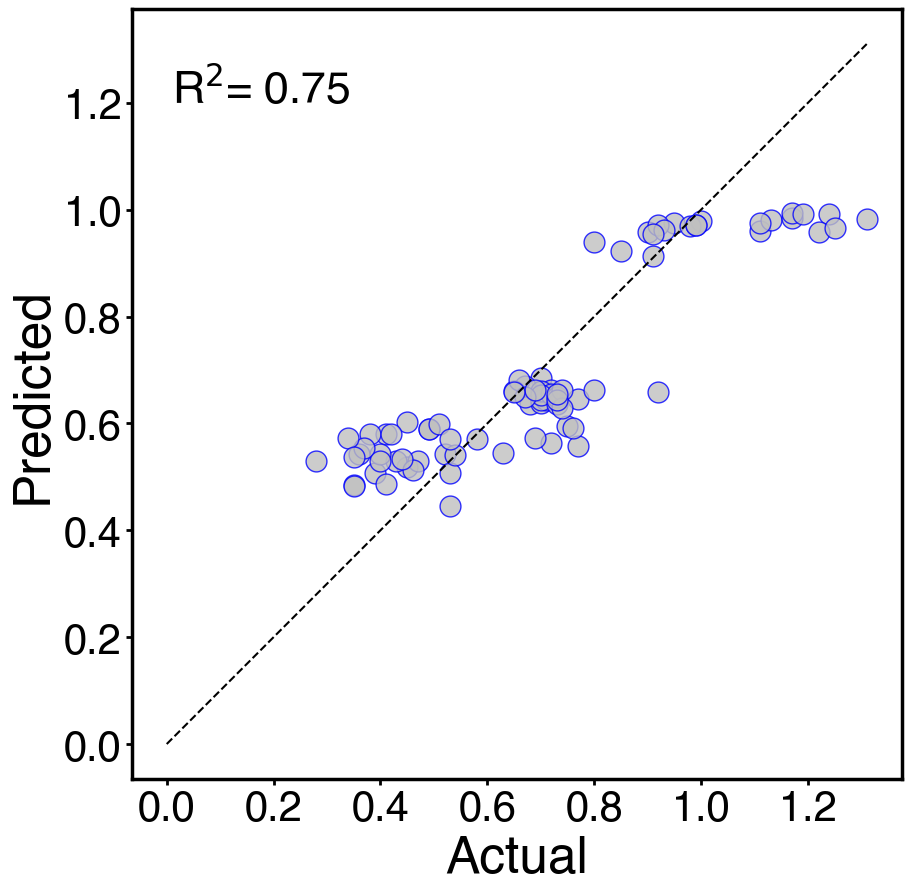

In [1490]:
plot = plot_pred_vs_act2(y_test,y_pred,'mlr',r2)

In [1491]:
seeds=[i for i in range(100)]

In [1492]:
dat_col=['seed','coef1','coef2','intercept','r2_test','r2_train','mae','rmse']
dat=pd.DataFrame(columns=dat_col)
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size=0.20, random_state=seed)
    #print(X_train.shape)
    #print(X_test.shape)
    res_reg=do_lin_reg(X_train,y_train,X_test,y_test)
    row_to_append=[int(seed),res_reg[0][0],res_reg[0][1],res_reg[1],res_reg[2],res_reg[3],res_reg[4],res_reg[5]]
    dat.loc[len(dat.index)] = row_to_append
dat_sort=dat.sort_values(by="r2_test",ascending=False)

In [1493]:
error=(0.116402/1.310000)*100
error

8.885648854961833

In [1494]:
dat_sort.to_csv("dat_col.csv")
df_seed_based_df=pd.read_csv("dat_col.csv")
##df_seed_based_df.head()
seed=int(df_seed_based_df['seed'][0])
seed

40

In [1495]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y, test_size=0.20, random_state=seed)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# print(X_train)
# print(X_test)

(332, 2)
(83, 2)


In [1496]:
new_result_train_df=pd.DataFrame()
new_result_test_df=pd.DataFrame()
new_result_train_df['Actual']=y_train.tolist()
new_result_test_df['Actual']=y_test.tolist()
#new_result_train_df
# X_train

In [1497]:
r2_train=[]
r2_test=[]
def give_the_model_and_get_plot(X_train,X_test,y_train,y_test,model,model_name):
    # Create an instance of the model class
    reg = model()
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    y_pred_train=reg.predict(X_train)
    new_result_train_df[f'{model_name}_pred']=y_pred_train.tolist()
    new_result_test_df[f'{model_name}_pred']=y_pred.tolist()
    r2_test_val=r2_score(y_test, y_pred)
    r2_train_val=r2_score(y_train, y_pred_train)
    #plot = plot_pred_vs_act2(y_test,y_pred,model_name,r2)
    return r2_test_val,r2_train_val
    

In [1498]:
for model_name, model in simple_reg_model_names.items():
    r2_test_val,r2_train_val=give_the_model_and_get_plot(X_train,X_test,y_train,y_test,model,model_name)
    r2_train.append(r2_train_val)
    r2_test.append(r2_test_val)
r2_df=pd.DataFrame()
#r2_df.columns=["train","test"]
r2_df.index=["Ridge","Lasso","RandomForestRegressor","SVR","KNeighborsRegressor","LinearRegression","BayesianRidge"]
r2_df["train"]=r2_train
r2_df["test"]=r2_test
r2_df

,train,test
Ridge,0.600560,0.749706
Lasso,0.000000,-0.000009
RandomForestRegressor,0.963583,0.887543
SVR,0.772186,0.886627
KNeighborsRegressor,0.857072,0.875556
LinearRegression,0.600563,0.750288
BayesianRidge,0.600551,0.749080


In [1499]:

import xgboost as xgb

In [1500]:
# # Create regression matrices
# dtrain_reg = xgb.DMatrix(X_train, y_train)
# dtest_reg = xgb.DMatrix(X_test, y_test)

In [1501]:
# # Define hyperparameters
# params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

# n = 100
# model = xgb.train(
#    params=params,
#    dtrain=dtrain_reg,
#    num_boost_round=n,
# )

In [1502]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=50)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
# Save model into JSON format.
clf.save_model("clf.json")

[0]	validation_0-merror:1
[1]	validation_0-merror:1
[2]	validation_0-merror:1
[3]	validation_0-merror:1
[4]	validation_0-merror:1
[5]	validation_0-merror:1
[6]	validation_0-merror:1
[7]	validation_0-merror:1
[8]	validation_0-merror:1
[9]	validation_0-merror:1
[10]	validation_0-merror:1
[11]	validation_0-merror:1
[12]	validation_0-merror:1
[13]	validation_0-merror:1
[14]	validation_0-merror:1
[15]	validation_0-merror:1
[16]	validation_0-merror:1
[17]	validation_0-merror:1
[18]	validation_0-merror:1
[19]	validation_0-merror:1
[20]	validation_0-merror:1
[21]	validation_0-merror:1
[22]	validation_0-merror:1
[23]	validation_0-merror:1
[24]	validation_0-merror:1
[25]	validation_0-merror:1
[26]	validation_0-merror:1
[27]	validation_0-merror:1
[28]	validation_0-merror:1
[29]	validation_0-merror:1
[30]	validation_0-merror:1
[31]	validation_0-merror:1
[32]	validation_0-merror:1
[33]	validation_0-merror:1
[34]	validation_0-merror:1
[35]	validation_0-merror:1
[36]	validation_0-merror:1
[37]	valida

In [1503]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
preds1 = clf.predict(X_test)
preds2 = clf.predict(X_train)
y_test_pred=le.inverse_transform(preds1)
y_train_pred=le.inverse_transform(preds2)


r2_Score_train = r2_score(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train,y_train_pred)
rmse_train = mean_squared_error (y_train,y_train_pred,squared=False)
r2_Score_test = r2_score(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test,y_test_pred)
rmse_test = mean_squared_error (y_test,y_test_pred,squared=False)
df_simple_reg.loc[len(df_simple_reg.index)] = ["xgb", "XGBoost",'model_params','fit_time',r2_Score_train,mae_train,rmse_train,r2_Score_test,mae_test,rmse_test] 




new_result_train_df['xgb']=xgb_train_pred.tolist()
new_result_test_df['xgb']=xgb_test_pred.tolist()
r2_xgb_train=r2_score(y_train, xgb_train_pred)
r2_xgb_test=r2_score(y_test, xgb_test_pred)
r2_index=r2_df.index.tolist()
print(r2_index)
r2_df['models']=r2_index
r2_index=[i for i in range(0,len(r2_index))]
r2_df=r2_df.reset_index()
r2_df.set_index('models')
#r2_df.loc[len(r2_df.index)] = [r2_xgb_train,r2_xgb_test,"xgb"] 
#r2_df.index=r2_index
print([r2_xgb_train,r2_xgb_test])
r2_df

['Ridge', 'Lasso', 'RandomForestRegressor', 'SVR', 'KNeighborsRegressor', 'LinearRegression', 'BayesianRidge']
[-3.7417413326855016, 0.802104178104447]


,index,train,test,models
0,Ridge,0.600560,0.749706,Ridge
1,Lasso,0.000000,-0.000009,Lasso
2,RandomForestRegressor,0.963583,0.887543,RandomForestRegressor
3,SVR,0.772186,0.886627,SVR
4,KNeighborsRegressor,0.857072,0.875556,KNeighborsRegressor
5,LinearRegression,0.600563,0.750288,LinearRegression
6,BayesianRidge,0.600551,0.749080,BayesianRidge


In [1504]:
from xgboost import XGBClassifier
learn = XGBClassifier()
learn.fit(X_train, y_train)
print (learn)

XGBClassifier(objective='multi:softprob')


In [1505]:
new_result_train_df.to_csv("train_pred.csv")

In [1506]:
new_result_test_df.to_csv("test_pred.csv")

In [1507]:
r2_df.to_csv("r2.csv")
r2_df

,index,train,test,models
0,Ridge,0.600560,0.749706,Ridge
1,Lasso,0.000000,-0.000009,Lasso
2,RandomForestRegressor,0.963583,0.887543,RandomForestRegressor
3,SVR,0.772186,0.886627,SVR
4,KNeighborsRegressor,0.857072,0.875556,KNeighborsRegressor
5,LinearRegression,0.600563,0.750288,LinearRegression
6,BayesianRidge,0.600551,0.749080,BayesianRidge


In [1508]:
df_simple_reg

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_test,mae_test,rmse_test
0,lr,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.000516,0.000000,0.183954,0.234539,-0.000009,0.198629,0.254516
1,bayesR,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_in...",0.000274,0.600551,0.117461,0.148233,0.749080,0.102587,0.127492
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.001635,0.600560,0.117488,0.148232,0.749706,0.102503,0.127332
3,mlr,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.000346,0.600563,0.117514,0.148231,0.750288,0.102425,0.127184
4,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.001538,0.772186,0.080519,0.111945,0.886627,0.066535,0.085697
5,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000173,0.857072,0.057964,0.088670,0.875556,0.067205,0.089784
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.058522,0.960630,0.029997,0.046537,0.888376,0.060362,0.085034
7,xgb,XGBoost,model_params,fit_time,-3.741741,41.939066,47.089150,0.802104,0.073976,0.113222


In [1509]:
df_simple_reg.to_csv("df_simple_reg.csv")